In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
# import statsmodels.api as sm
# from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy import fftpack

# Objectif du notebook

A partir du dataset original, suivant la période retenue, le notebook a pour objectif d'épurer le signal des variables à expliquer au moyen de la transformation de Fourier.

In [2]:
# Import du fichier correspondant à la période de 3H
df = pd.read_csv('./dataset/France_D.csv')
df.head(1)

,Dates,Consommation,Thermique,Nucléaire,Eolien,Solaire,Hydraulique,Pompage,Bioénergies,Balance
0,2013-01-01,54467.220833,3668.291667,49447.775,2613.7875,117.333333,6805.141667,-1388.720833,719.079167,7515.466667


In [3]:
france = df[['Dates']]

# Balance

In [4]:
data = df['Balance'].values

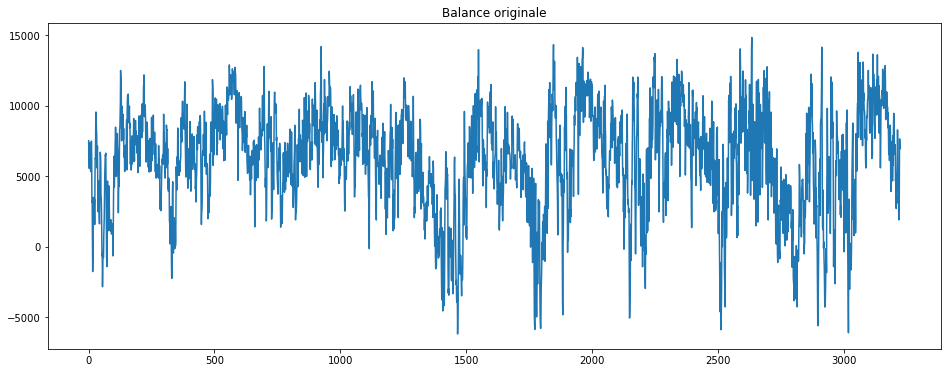

In [5]:
plt.figure(figsize=(16, 6))
plt.plot(data)
plt.title('Balance originale');

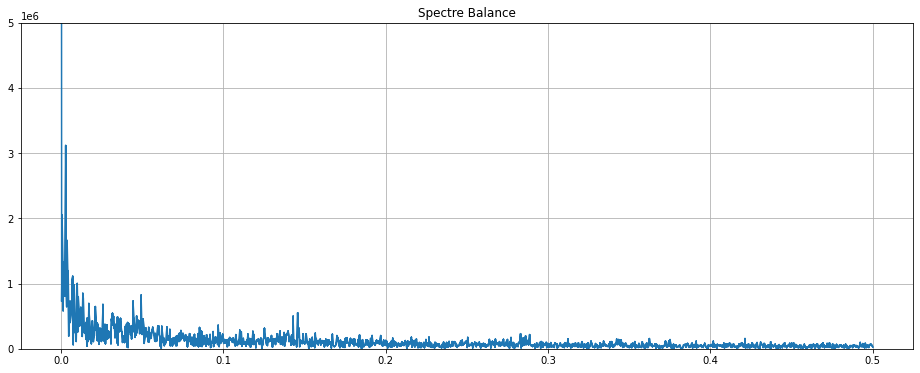

In [6]:
# Spectre du signal
fourier = fftpack.fft(data)
frequences = fftpack.fftfreq(data.size)
power = np.abs(fourier)
plt.figure(figsize=(16, 6))
plt.plot(np.abs(frequences), power)
plt.title('Spectre Balance')
plt.ylim((0, 5e6))
plt.grid();

''

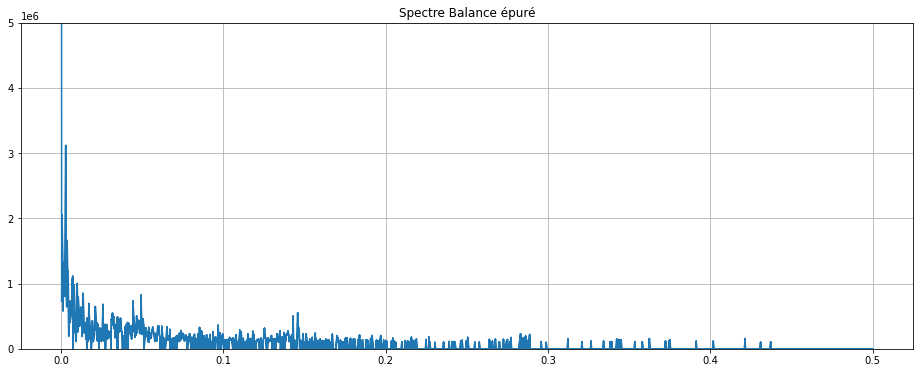

In [7]:
# Elimination du bruit
filtre = 0.1e6
fourier[power < filtre] = 0
plt.figure(figsize=(16, 6))
plt.plot(np.abs(frequences), np.abs(fourier))
plt.title('Spectre Balance épuré')
plt.ylim((0, 5e6))
plt.grid()
;

C:\Python\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


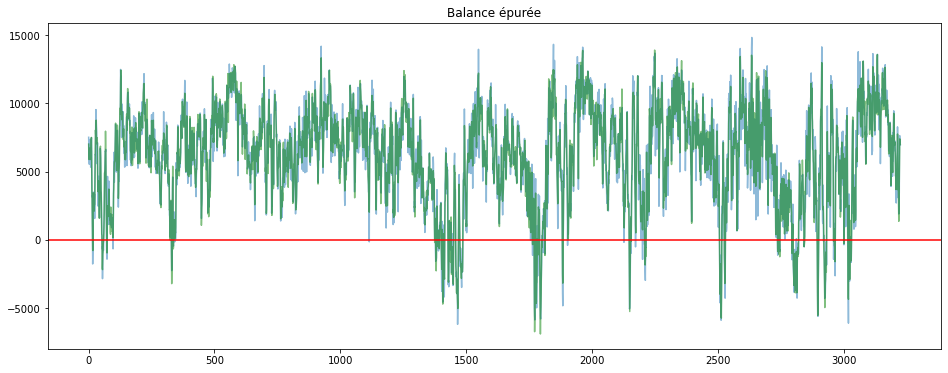

In [8]:
# Reconstitution du signal
filtered_data = fftpack.ifft(fourier)
plt.figure(figsize=(16, 6))
plt.plot(data, alpha = 0.5)
plt.plot(filtered_data, color = 'g', alpha = 0.5)
plt.title('Balance épurée')
plt.axhline(0, color = 'r');

In [9]:
france['Balance'] = filtered_data.tolist()

<ipython-input-9-9eaf66574dab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  france['Balance'] = filtered_data.tolist()


# Consommation

In [10]:
data = df['Consommation'].values

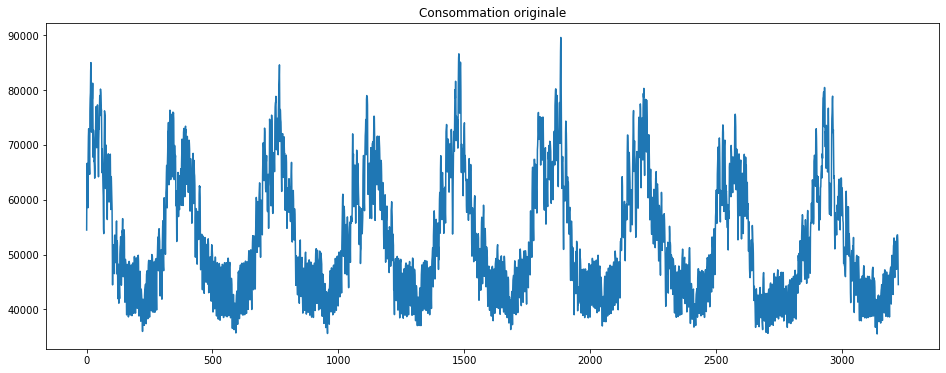

In [11]:
plt.figure(figsize=(16, 6))
plt.plot(data)
plt.title('Consommation originale');

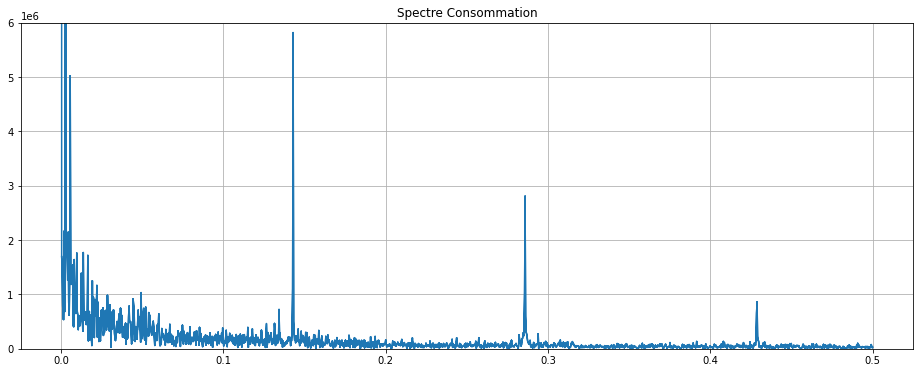

In [12]:
# Spectre du signal
fourier = fftpack.fft(data)
frequences = fftpack.fftfreq(data.size)
power = np.abs(fourier)
plt.figure(figsize=(16, 6))
plt.plot(np.abs(frequences), power)
plt.title('Spectre Consommation')
plt.ylim((0, 6e6))
plt.grid();

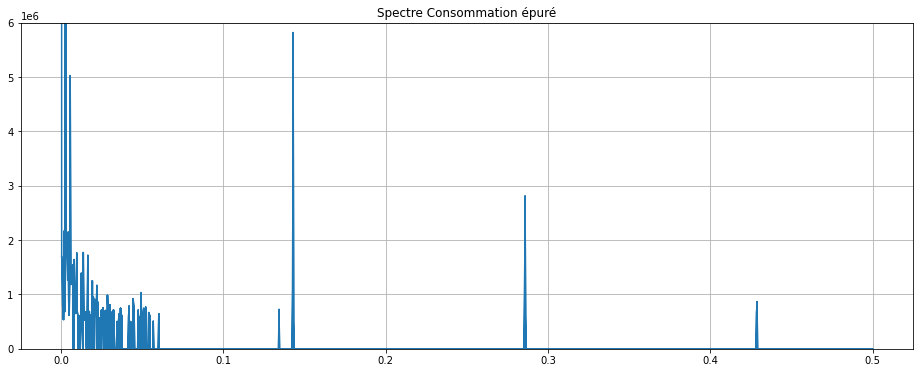

In [13]:
# Elimination du bruit
filtre = 0.5e6
fourier[power < filtre] = 0
plt.figure(figsize=(16, 6))
plt.plot(np.abs(frequences), np.abs(fourier))
plt.title('Spectre Consommation épuré')
plt.ylim((0, 6e6))
plt.grid();

C:\Python\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


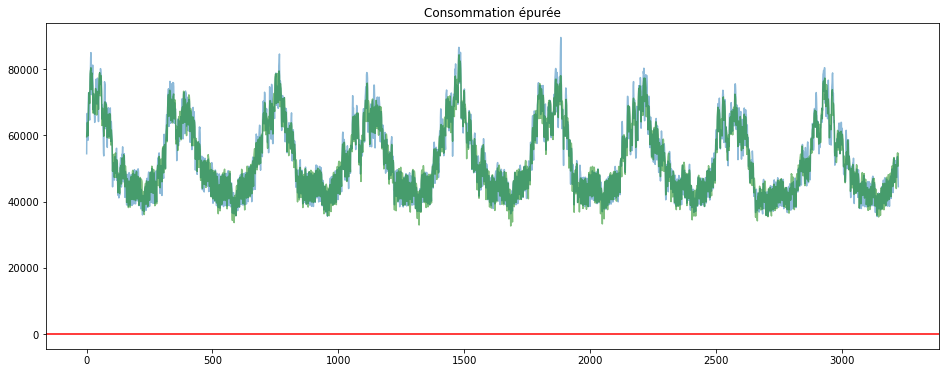

In [14]:
# Reconstitution du signal
filtered_data = fftpack.ifft(fourier)
plt.figure(figsize=(16, 6))
plt.plot(data, alpha = 0.5)
plt.plot(filtered_data, color = 'g', alpha = 0.5)
plt.title('Consommation épurée')
plt.axhline(0, color = 'r');

In [15]:
france['Consommation'] = filtered_data.tolist()

<ipython-input-15-2cd26e90e1cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  france['Consommation'] = filtered_data.tolist()


# Production éolienne

In [16]:
data = df['Eolien'].values

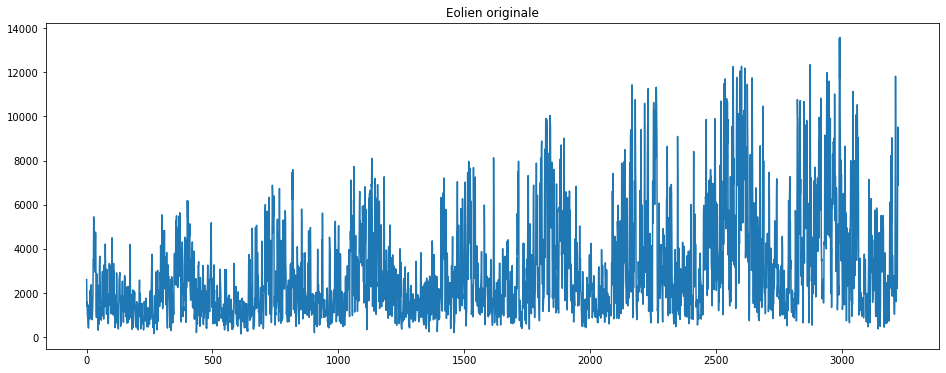

In [17]:
plt.figure(figsize=(16, 6))
plt.plot(data)
plt.title('Eolien originale');

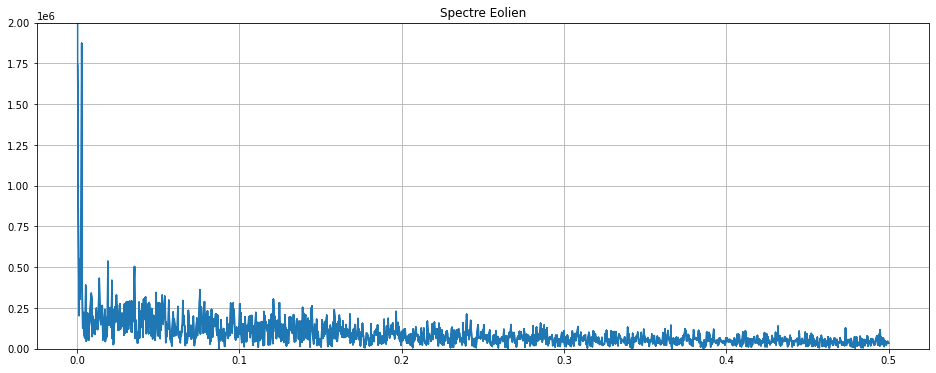

In [18]:
# Spectre du signal
fourier = fftpack.fft(data)
frequences = fftpack.fftfreq(data.size)
power = np.abs(fourier)
plt.figure(figsize=(16, 6))
plt.plot(np.abs(frequences), power)
plt.title('Spectre Eolien')
plt.ylim((0, 2e6))
plt.grid();

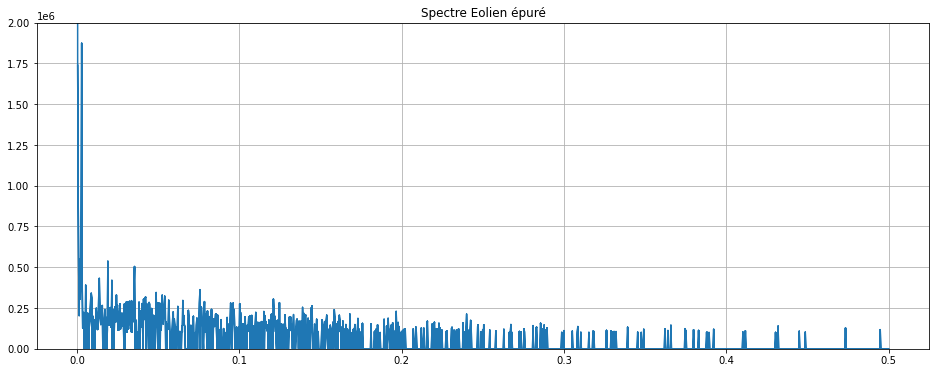

In [19]:
# Elimination du bruit
filtre = 0.1e6
fourier[power < filtre] = 0
plt.figure(figsize=(16, 6))
plt.plot(np.abs(frequences), np.abs(fourier))
plt.title('Spectre Eolien épuré')
plt.ylim((0, 2e6))
plt.grid();

C:\Python\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


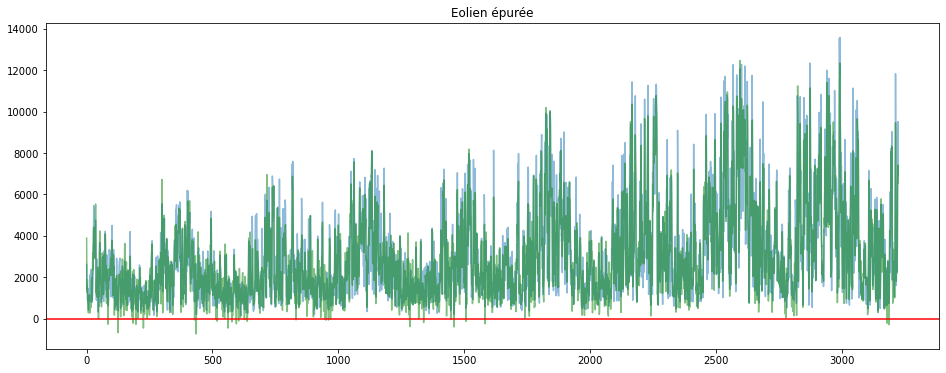

In [20]:
# Reconstitution du signal
filtered_data = fftpack.ifft(fourier)
plt.figure(figsize=(16, 6))
plt.plot(data, alpha = 0.5)
plt.plot(filtered_data, color = 'g', alpha = 0.5)
plt.title('Eolien épurée')
plt.axhline(0, color = 'r');

In [21]:
france['Eolien'] = filtered_data.tolist()

<ipython-input-21-846e8f16ba31>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  france['Eolien'] = filtered_data.tolist()


# Production solaire

In [22]:
data = df['Solaire'].values

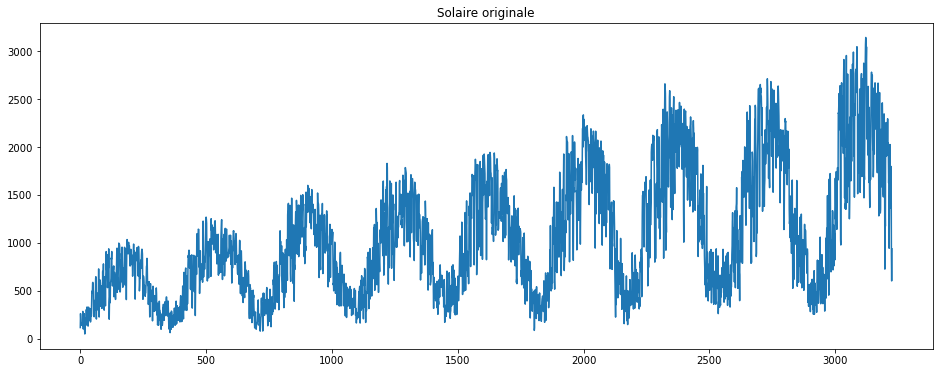

In [23]:
plt.figure(figsize=(16, 6))
plt.plot(data)
plt.title('Solaire originale');

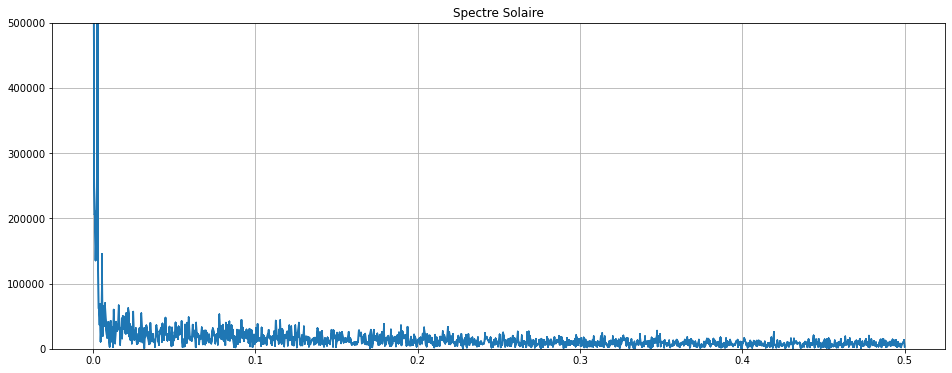

In [24]:
# Spectre du signal
fourier = fftpack.fft(data)
frequences = fftpack.fftfreq(data.size)
power = np.abs(fourier)
plt.figure(figsize=(16, 6))
plt.plot(np.abs(frequences), power)
plt.title('Spectre Solaire')
plt.ylim((0, 5e5))
plt.grid();

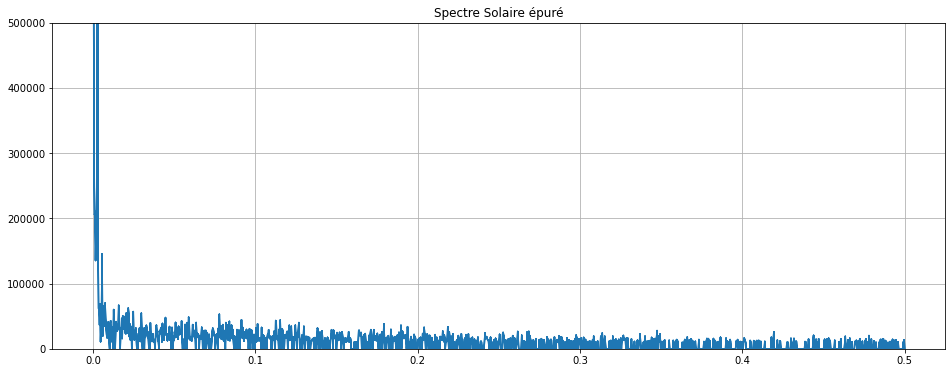

In [25]:
# Elimination du bruit
filtre = 0.1e5
fourier[power < filtre] = 0
plt.figure(figsize=(16, 6))
plt.plot(np.abs(frequences), np.abs(fourier))
plt.title('Spectre Solaire épuré')
plt.ylim((0, 5e5))
plt.grid();

C:\Python\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


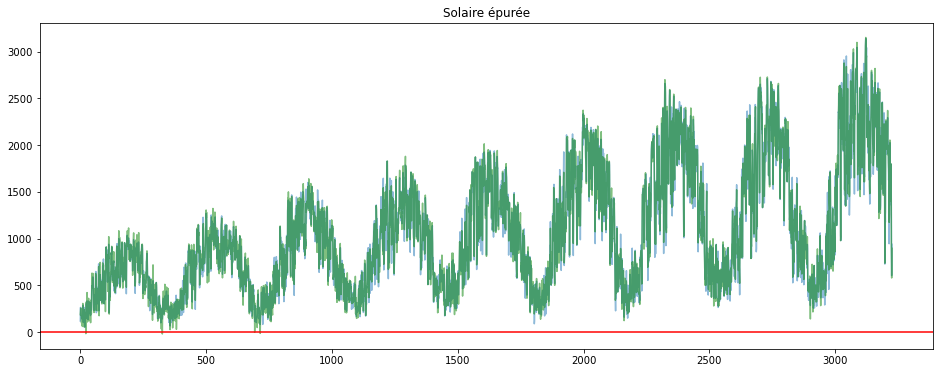

In [26]:
# Reconstitution du signal
filtered_data = fftpack.ifft(fourier)
plt.figure(figsize=(16, 6))
plt.plot(data, alpha = 0.5)
plt.plot(filtered_data, color = 'g', alpha = 0.5)
plt.title('Solaire épurée')
plt.axhline(0, color = 'r');

In [27]:
france['Solaire'] = filtered_data.tolist()

<ipython-input-27-948e0575376e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  france['Solaire'] = filtered_data.tolist()


# Production Hydraulique

In [28]:
data = df['Hydraulique'].values

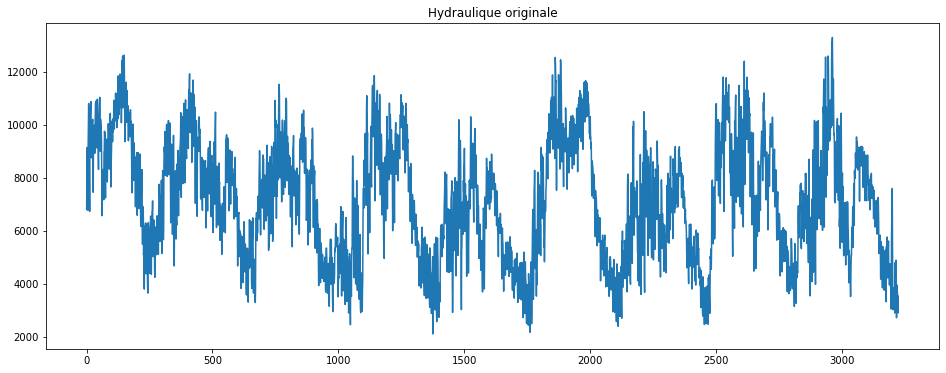

In [29]:
plt.figure(figsize=(16, 6))
plt.plot(data)
plt.title('Hydraulique originale');

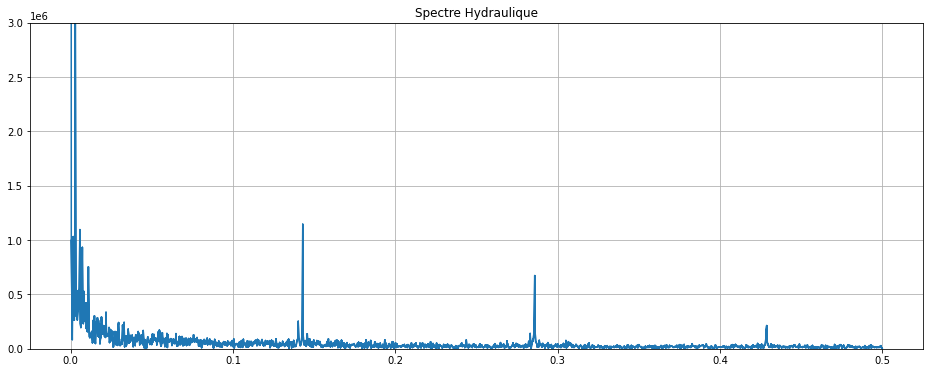

In [30]:
# Spectre du signal
fourier = fftpack.fft(data)
frequences = fftpack.fftfreq(data.size)
power = np.abs(fourier)
plt.figure(figsize=(16, 6))
plt.plot(np.abs(frequences), power)
plt.title('Spectre Hydraulique')
plt.ylim((0, 3e6))
plt.grid();

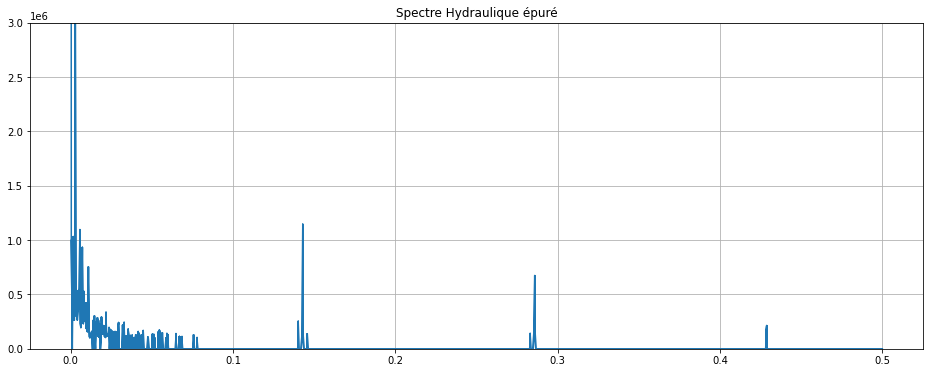

In [31]:
# Elimination du bruit
filtre = 0.1e6
fourier[power < filtre] = 0
plt.figure(figsize=(16, 6))
plt.plot(np.abs(frequences), np.abs(fourier))
plt.title('Spectre Hydraulique épuré')
plt.ylim((0, 3e6))
plt.grid();

C:\Python\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


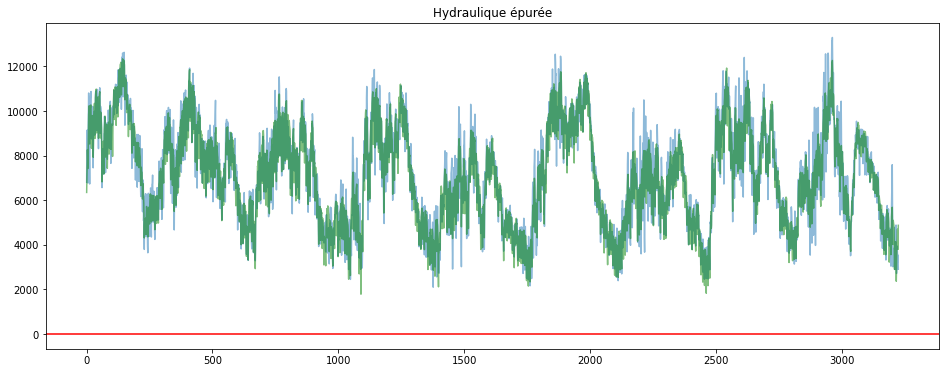

In [32]:
# Reconstitution du signal
filtered_data = fftpack.ifft(fourier)
plt.figure(figsize=(16, 6))
plt.plot(data, alpha = 0.5)
plt.plot(filtered_data, color = 'g', alpha = 0.5)
plt.title('Hydraulique épurée')
plt.axhline(0, color = 'r');

In [33]:
france['Hydraulique'] = filtered_data.tolist()

<ipython-input-33-069c6645cab2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  france['Hydraulique'] = filtered_data.tolist()


In [34]:
france.set_index('Dates', inplace = True)
france = france.astype(float)
france.head(1)

C:\Python\Anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:995: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)


,Balance,Consommation,Eolien,Solaire,Hydraulique
Dates,,,,,
2013-01-01,7016.331143,59593.969284,3889.837808,185.528466,6348.37141


In [35]:
france.to_csv('./dataset/France_D_filtered.csv')